### Importing libraries & functions





In [379]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,roc_curve,f1_score
import seaborn as sns 
import matplotlib.pyplot as plt


### Importing dataset

In [380]:
dataset=pd.read_excel("a_Dataset_CreditScoring.xlsx")

### Data preparation

In [381]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [382]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,582,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,662,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,805,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,1175,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,1373,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [383]:
#dropping customer ID column from the dataset
dataset=dataset.drop(columns=['ID','TLCnt03','BanruptcyInd','TLMaxSum','TLBalHCPct','TLSum'])
dataset.shape

(3000, 24)

In [384]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


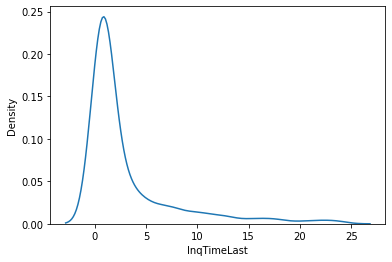

In [385]:
sns.distplot(dataset['InqTimeLast'],hist=False)

In [386]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


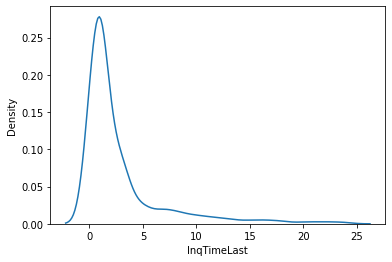

In [413]:
sns.distplot(dataset['InqTimeLast'],hist=False,label='InqTimeLast')

In [388]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [389]:
#count of good loans (0) and bad loans (1)
# Hence Imbalnced Dataset
dataset['TARGET'].value_counts()

0.0    2500
1.0     500
Name: TARGET, dtype: int64

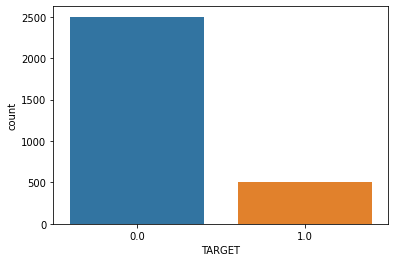

In [390]:
sns.countplot(x='TARGET',data=dataset)

### Train Test Split

In [391]:
y = dataset.iloc[:, 0]
X = dataset.iloc[:, 1:29]

In [392]:
#Applying oversampling technique to handle imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

dataset = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [393]:
#oversampling results
dataset['TARGET'].value_counts()

1.0    2500
0.0    2500
Name: TARGET, dtype: int64

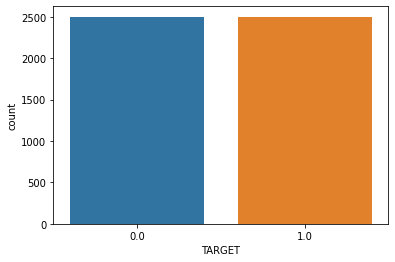

In [394]:
sns.countplot(x='TARGET',data=dataset)

In [395]:
# splitting dataset into training and test (in ratio 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [396]:
#Feature selection on the basis of Information Value
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.23532148, 0.19492631, 0.29957316, 0.27200765, 0.33433508,
       0.21773872, 0.32067627, 0.21555618, 0.29049181, 0.32784393,
       0.33240889, 0.25934686, 0.16452753, 0.29457567, 0.31257173,
       0.24731829, 0.22235838, 0.22401144, 0.32587913, 0.23311673,
       0.27214524, 0.3003605 , 0.23548142])

In [397]:
#Arranging the features according to the ascending Information Value
mutual_info=pd.Series(mutual_info)
mutual_info.index= X_train.columns
mutual_info.sort_values(ascending=False)

InqFinanceCnt24    0.334335
TLSatCnt           0.332409
TLCnt              0.327844
TLDel60CntAll      0.325879
TLTimeLast         0.320676
TL50UtilCnt        0.312572
TLDel60Cnt24       0.300360
InqCnt06           0.299573
TL75UtilCnt        0.294576
TLCnt24            0.290492
TLBadDerogCnt      0.272145
InqTimeLast        0.272008
TLDel60Cnt         0.259347
TLSatPct           0.247318
TLOpen24Pct        0.235481
DerogCnt           0.235321
TLOpenPct          0.233117
TLDel90Cnt24       0.224011
TLDel3060Cnt24     0.222358
TLTimeFirst        0.217739
TLCnt12            0.215556
CollectCnt         0.194926
TLBadCnt24         0.164528
dtype: float64

In [398]:
#Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Risk Model building

In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [400]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [401]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}


In [402]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    
    
    return accuracy,precision,recall

In [403]:
accuracy_scores = []
precision_scores = []
recall_scores=[]



for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall= train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall - ",current_recall)



    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

For  SVC
Accuracy -  0.577
Precision -  0.578
recall -  0.5768463073852296
For  KN
Accuracy -  0.823
Precision -  0.7563291139240507
recall -  0.9540918163672655
For  DT
Accuracy -  0.813
Precision -  0.8600917431192661
recall -  0.7485029940119761
For  LR
Accuracy -  0.733
Precision -  0.7447698744769874
recall -  0.7105788423153693
For  RF
Accuracy -  0.908
Precision -  0.9323467230443975
recall -  0.8802395209580839
For  AdaBoost
Accuracy -  0.873
Precision -  0.8863636363636364
recall -  0.8562874251497006
For  BgC
Accuracy -  0.894
Precision -  0.9140461215932913
recall -  0.8702594810379242
For  ETC
Accuracy -  0.93
Precision -  0.9217221135029354
recall -  0.9401197604790419
For  GBDT
Accuracy -  0.881
Precision -  0.9063829787234042
recall -  0.8502994011976048


In [404]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'recall':recall_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,recall
4,RF,0.908,0.932347,0.880240
7,ETC,0.930,0.921722,0.940120
6,BgC,0.894,0.914046,0.870259
8,GBDT,0.881,0.906383,0.850299
5,AdaBoost,0.873,0.886364,0.856287
2,DT,0.813,0.860092,0.748503
1,KN,0.823,0.756329,0.954092
3,LR,0.733,0.744770,0.710579
0,SVC,0.577,0.578000,0.576846


In [405]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.908000
1,ETC,Accuracy,0.930000
2,BgC,Accuracy,0.894000
3,GBDT,Accuracy,0.881000
4,AdaBoost,Accuracy,0.873000
5,DT,Accuracy,0.813000
6,KN,Accuracy,0.823000
7,LR,Accuracy,0.733000
8,SVC,Accuracy,0.577000
9,RF,Precision,0.932347


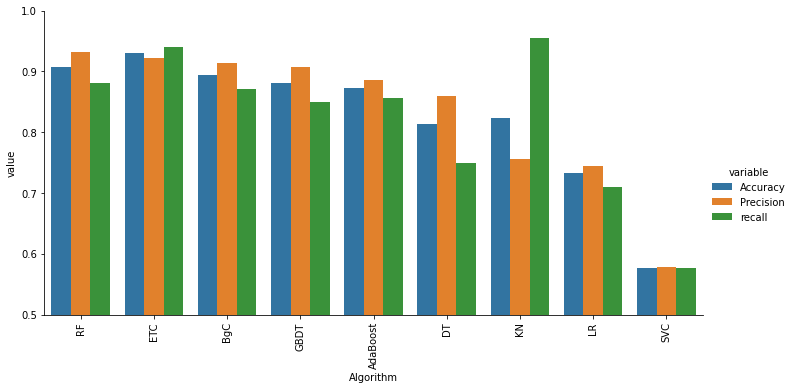

In [406]:
import matplotlib.pyplot as plt

import seaborn as sns 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5,aspect=2)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model *performance*

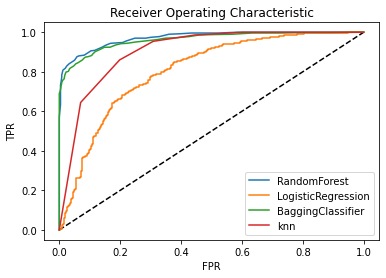

In [407]:
#ROC Curve
y_pred_prob1 = rfc.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = lrc.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = bc.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = knc.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RandomForest")
plt.plot(fpr2, tpr2, label= "LogisticRegression")
plt.plot(fpr3, tpr3, label= "BaggingClassifier")
plt.plot(fpr4, tpr4, label= "knn")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [408]:
y_pred= rfc.predict(X_test)


In [409]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(20)
a=y_test-y_pred

,Actual,Predicted
9,1.0,0.0
1852,0.0,0.0
4458,1.0,1.0
507,0.0,0.0
3731,1.0,1.0
4030,1.0,1.0
4334,1.0,1.0
1522,0.0,0.0
2917,0.0,0.0
2838,0.0,0.0
